# 第 1 章-准备工作
## 1.1 行话
- **数据规整（Munge/Munging/Wrangling）**：指的是将非结构化和（或）散乱数据处理为结构化或整洁形式的整个过程。
- **伪码（Pseudocode）**：算法或过程的“代码式”描述，而这些代码本身并不是实际有效的源代码。
- **语法糖（Syntactic sugar）**：这是一种编程语法，它并不会带来新的特性，但却能使代码更易读、更易写。

# 第 2 章-python 语法基础，IPython 和 Jupyter 笔记本
## 2.1 iPython 以及 Jupyter
### 2.1.1补全
- 按下tab可以实现补全，可以补全命名、对象和模块属性，还有文件的路径名，文件名等信息

### 2.1.2自省
- 变量前后使用'?'，可以显示对象的信息

In [6]:
b = [1, 2, 3]
b?

In [7]:
# 也可以作用于函数或实例
def add_numbers(a, b):
    """
    Add two numbers together

    Returns
    -------
    the_sum : type of arguments
    """
    return a + b
add_numbers?

- 在函数后面加上‘??’，还可以显示函数的源码

In [8]:
add_numbers??

### 2.1.3 %run命令
- 使用%run命令，运行所有python程序。假设有一个python文件：ipython_script_test.py

In [12]:
def f(x, y, z):
    return (x + y) / z

a = 5
b = 6
c = 7.5

result = f(a, b, c)

# 使用命令 %run ipython_script_test.py 可以运行

# 第 3 章-Python的数据结构、函数和文件
## 3.1 数据结构和序列
### 3.1.1 元组
- 元组是一个固定长度，不可改变的 Python 序列对象。创建元组的最简单方式，是用逗号分隔一列值：

In [13]:
tup = 4, 5, 6
tup

(4, 5, 6)

- 当用复杂的表达式定义元组，最好将值放到圆括号内:

In [14]:
nested_tup = (4,5,6), (7,8)
nested_tup

((4, 5, 6), (7, 8))

- 用tuple可以将任意序列或迭代器转换成元组：

In [18]:
tuple([4,0,2])

(4, 0, 2)

In [19]:
tuple('string')

('s', 't', 'r', 'i', 'n', 'g')

- 元组中的对象不可变，但是若元组中的可变对象可以变：

In [20]:
tup = tuple(['foo', [1, 2], True])

In [ ]:
tup[2] = False  #此元素不可变，执行错误

In [21]:
tup[1][0] = 3
tup  #元素tup[1]是数组，可以变，正确执行

('foo', [3, 2], True)

- 可以用”+“号将元组串起来：

In [22]:
(4, None, 'foo') + (6, 0) + ('bar',)

(4, None, 'foo', 6, 0, 'bar')

- 同理，数组也可以

In [23]:
[1,'a']+['1','123']

[1, 'a', '1', '123']

- 元组乘以一个整数，像列表一样，会将几个元组的复制串联起来：

In [24]:
('foo', 23) * 4

('foo', 23, 'foo', 23, 'foo', 23, 'foo', 23)

- 数组同理：

In [25]:
['foo', 'bar'] * 4

['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'bar']

### 3.1.2 拆分元组

In [26]:
tup = (4, 5, 6)
a,b,c = tup

print(a)
print(b)
print(c)

4
5
6


- 即使含有元组的元组也会被拆分

In [30]:
tup = 4, 5, (6, 7)
a,b,(c,d) = tup

print(a)
print(b)
print(c)
print(d)

4
5
6
7


- Python 最近新增了更多高级的元组拆分功能，允许从元组的开头“摘取”几个元素。它使用了特殊的语法*rest，这也用在函数签名中以抓取任意长度列表的位置参数：

In [31]:
values = 1,2,3,4,5
a,b,*rest = values
(a,b)

(1, 2)

In [32]:
rest  # rest 表示剩下的部分，一般是要舍弃的部分。 rest名字不重要，作为惯用写法，通常将舍弃的部分命名为下划线 _

[3, 4, 5]

In [33]:
a,b,*_ = values

_

[3, 4, 5]

### 3.1.3 元组方法
- 因为元组的大小和内容不能修改，它的实例方法都很轻量。其中一个很有用的就是count（也适用于列表），它可以统计某个值得出现频率：

In [34]:
a = (1, 2, 2, 2, 3, 4, 2)

a.count(2)

4

### 3.1.4 列表
- 与元组对比，列表的长度可变、内容可以被修改。你可以用方括号定义，或用list函数
- 列表和元组的语义接近，在许多函数中可以交叉使用

- list函数常用来在数据处理中实体化迭代器或生成器：

In [35]:
gen = range(10)
gen

range(0, 10)

In [36]:
list(gen)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

### 3.1.5 列表添加与删除
- 可以用append在列表末尾添加元素：

In [37]:
b = ['foo', 'peekaboo', 'baz']
b.append('qw')
b

['foo', 'peekaboo', 'baz', 'qw']

- insert可以在特定的位置插入元素：

In [38]:
b.insert(1,'red')
b

['foo', 'red', 'peekaboo', 'baz', 'qw']

- insert的逆运算是pop，它移除并返回指定位置的元素：

In [42]:
c = b.pop(2)

print(c)
print(b)

peekaboo
['foo', 'red', 'baz', 'qw']


- 可以用remove去除某个值，remove会先寻找第一个值并除去：

In [44]:
b = ['foo', 'red', 'baz', 'dwarf', 'foo']
b.remove('foo')
b

['red', 'baz', 'dwarf', 'foo']

- 用in可以检查列表是否包含某个值：

In [45]:
'red' in b

True

In [46]:
'red' not in b

False

# 第 4 章-NumPy 基础：数组和向量计算
## 4.1 ndarray-一种多维数组对象

In [3]:
import numpy as np

In [4]:
a = np.random.randn(2,3)  #生成一个 2X3 的ndarray

In [5]:
print(a)
print(a + a)
print(a * 10)

[[-1.51661016 -1.51098638 -0.11814407]
 [-1.48974442  0.96261582 -1.23049362]]
[[-3.03322032 -3.02197277 -0.23628814]
 [-2.97948883  1.92523164 -2.46098724]]
[[-15.16610159 -15.10986385  -1.1814407 ]
 [-14.89744417   9.62615819 -12.30493618]]


In [6]:
print(a.shape)
print(a.dtype)

(2, 3)
float64


### 创建ndarray
- 创建数组最简单的办法就是使用np.array函数。
- np.zeros
- np.ones
- np.empty
- np.arange. arange是 Python 内置函数range的数组版：
- np.asarray
- np.ones_like
- np.zeros_like
- np.empty_like
- np.eye / np.identity

In [7]:
b = np.arange(15)
print(type(b))
print(b)

<class 'numpy.ndarray'>
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


In [9]:
np.asarray(a)

array([[-1.51661016, -1.51098638, -0.11814407],
       [-1.48974442,  0.96261582, -1.23049362]])

In [10]:
np.asarray(b)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [11]:
np.ones_like(a)

array([[1., 1., 1.],
       [1., 1., 1.]])

In [12]:
np.zeros_like(a)

array([[0., 0., 0.],
       [0., 0., 0.]])

### ndarray的数据类型

In [13]:
a = np.array([1,2,3,4,5])
print(a.dtype)
print(a)

int64
[1 2 3 4 5]


In [16]:
# ndarray.astype 将旧的数组类型转化为指定类型，并返回新的数组
b = a.astype('float64')
print(a)
print(b)

[1 2 3 4 5]
[1. 2. 3. 4. 5.]


**调用astype总会创建一个新的数组（一个数据的备份），即使新的dtype与旧的dtype相同。**

In [19]:
b = np.array(['1.25', '-9.6', '42'], dtype=np.string_)
b.dtype

dtype('S4')

In [20]:
c = b.astype('float')
c.dtype

dtype('float64')

In [21]:
b.dtype

dtype('S4')

### numpy数组运算

- 数组很重要，因为它使你不用编写循环即可对数据执行批量运算。NumPy 用户称其为向量化（vectorization）。大小相等的数组之间的任何算术运算都会将运算应用到元素级：

In [22]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])

In [23]:
arr

array([[1., 2., 3.],
       [4., 5., 6.]])

In [24]:
arr * arr

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [25]:
arr - arr

array([[0., 0., 0.],
       [0., 0., 0.]])

数组与标量的算术运算会将标量值传播到各个元素**(广播机制)**：

In [26]:
1 / arr

array([[1.        , 0.5       , 0.33333333],
       [0.25      , 0.2       , 0.16666667]])

In [27]:
arr ** 0.5

array([[1.        , 1.41421356, 1.73205081],
       [2.        , 2.23606798, 2.44948974]])

大小相同的数组之间的比较会生成布尔值数组：

In [28]:
arr2 = np.array([[0., 4., 1.], [7., 2., 12.]])

In [29]:
arr2

array([[ 0.,  4.,  1.],
       [ 7.,  2., 12.]])

In [30]:
arr < arr2

array([[False,  True, False],
       [ True, False,  True]])

In [31]:
(arr < arr2).dtype

dtype('bool')

### 基本的索引和切片
一维数组很简单。从表面上看，它们跟 Python 列表的功能差不多：

In [32]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [33]:
arr[5:8]

array([5, 6, 7])

In [34]:
arr[5:8] = 12  #ndarray的广播机制可以将赋值12 传播到整个切片
arr            #但是在python原生list中，这样的赋值是错误的。只能: arr[5:8] = 12,12,12 才能达到上述效果

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

In [50]:
d = np.arange(9).reshape((3,3))
d = d+1
d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [55]:
d[:2, 1:]

array([[2, 3],
       [5, 6]])

In [56]:
d[:2, 1:] = 0
d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

### 布尔型索引

In [57]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [59]:
data = np.random.randn(7,4)
data

array([[-1.05907555, -0.32767689, -1.01398956, -1.09872452],
       [-0.07025578,  0.38010601,  1.12102425,  0.15100545],
       [-0.49958421,  0.20908918, -0.02313565, -0.63978855],
       [ 1.44670185, -0.4088779 ,  0.73270833,  0.50909393],
       [ 0.18649707, -2.12375784, -1.21343016, -0.78260694],
       [-0.14884995,  0.74949849, -0.86327542,  0.24141069],
       [-0.53553587, -0.05514358,  1.58291453,  0.82737937]])

In [60]:
names == 'Bob'

array([ True, False, False,  True, False, False, False])

In [62]:
data[names == 'Bob']

array([[-1.05907555, -0.32767689, -1.01398956, -1.09872452],
       [ 1.44670185, -0.4088779 ,  0.73270833,  0.50909393]])

In [63]:
data[names == 'Bob', 2:]

array([[-1.01398956, -1.09872452],
       [ 0.73270833,  0.50909393]])

通过布尔型数组设置值是一种经常用到的手段。为了将data中的所有负值都设置为 0，我们只需：

In [64]:
data[data < 0] = 0
data

array([[0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.38010601, 1.12102425, 0.15100545],
       [0.        , 0.20908918, 0.        , 0.        ],
       [1.44670185, 0.        , 0.73270833, 0.50909393],
       [0.18649707, 0.        , 0.        , 0.        ],
       [0.        , 0.74949849, 0.        , 0.24141069],
       [0.        , 0.        , 1.58291453, 0.82737937]])

### 花式索引

In [65]:
arr = np.empty((8, 4))
arr

array([[2.68156159e+154, 2.68156159e+154, 9.88131292e-323,
        0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000],
       [0.00000000e+000, 9.97445079e-309, 2.68156159e+154,
        2.68156159e+154],
       [6.42285340e-323, 0.00000000e+000, 1.38379156e-047,
        2.52545403e-052],
       [5.39462937e-062, 4.28009013e-033, 1.00574497e-070,
        3.08798268e-057],
       [2.63026389e-052, 2.21345656e-052, 2.25417440e+184,
        2.00965393e-308],
       [6.93586250e-310, 2.76676762e-322, 0.00000000e+000,
        0.00000000e+000]])

In [67]:
for i in range(8):
    arr[i] = i
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

为了以特定顺序选取行子集，只需传入一个用于指定顺序的整数列表或ndarray即可：

In [68]:
arr[[4, 3, 0, 6]]  # 返回 第4，3，0，6行的集合，即二维数组

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

In [69]:
arr[[3]]  # 返回第3行的集合，也是二维数组

array([[3., 3., 3., 3.]])

In [70]:
arr[3] # 返回一个数组，一维

array([3., 3., 3., 3.])

In [72]:
arr[[-3, -5 , -7]] #使用负数索引将会从末尾开始选取行：

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

一次传入多个索引数组会有一点特别。它返回的是一个一维数组，其中的元素对应各个索引元组：

In [73]:
arr = np.arange(32).reshape((8, 4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [74]:
arr[[1, 5, 7, 2], [0, 3, 1, 2]]  #返回一维数组，索引分别为[1,0],[5,3],[7,1],[2,2]

array([ 4, 23, 29, 10])

这个花式索引的行为可能会跟某些用户的预期不一样，选取矩阵的行列子集应该是矩形区域的形式才对。下面是得到该结果的一个办法：

In [75]:
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]] 

#首先选第1，5，7，2行
#然后再选第0，3，1，2列

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

### 数组转置和轴对换
转置是重塑的一种特殊形式，它返回的是源数据的视图（不会进行任何复制操作）。数组不仅有transpose方法，还有一个特殊的T属性：

In [80]:
arr = np.arange(18).reshape((6, 3))
arr

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14],
       [15, 16, 17]])

In [81]:
arr.T  # 转置矩阵

array([[ 0,  3,  6,  9, 12, 15],
       [ 1,  4,  7, 10, 13, 16],
       [ 2,  5,  8, 11, 14, 17]])

In [86]:
arr.transpose()  # 转置矩阵第2种方法

array([[ 0,  3,  6,  9, 12, 15],
       [ 1,  4,  7, 10, 13, 16],
       [ 2,  5,  8, 11, 14, 17]])

In [87]:
arr3d = np.arange(24).reshape((2,3,4))
arr3d

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [88]:
arr3d.T  #三维矩阵的转置

array([[[ 0, 12],
        [ 4, 16],
        [ 8, 20]],

       [[ 1, 13],
        [ 5, 17],
        [ 9, 21]],

       [[ 2, 14],
        [ 6, 18],
        [10, 22]],

       [[ 3, 15],
        [ 7, 19],
        [11, 23]]])

In [95]:
arr3d.transpose()

array([[[ 0, 12],
        [ 4, 16],
        [ 8, 20]],

       [[ 1, 13],
        [ 5, 17],
        [ 9, 21]],

       [[ 2, 14],
        [ 6, 18],
        [10, 22]],

       [[ 3, 15],
        [ 7, 19],
        [11, 23]]])

In [82]:
np.dot(arr, arr.T)  #矩阵乘法

array([[  5,  14,  23,  32,  41,  50],
       [ 14,  50,  86, 122, 158, 194],
       [ 23,  86, 149, 212, 275, 338],
       [ 32, 122, 212, 302, 392, 482],
       [ 41, 158, 275, 392, 509, 626],
       [ 50, 194, 338, 482, 626, 770]])

In [83]:
arr@arr.T  #矩阵乘法的第2种方法

array([[  5,  14,  23,  32,  41,  50],
       [ 14,  50,  86, 122, 158, 194],
       [ 23,  86, 149, 212, 275, 338],
       [ 32, 122, 212, 302, 392, 482],
       [ 41, 158, 275, 392, 509, 626],
       [ 50, 194, 338, 482, 626, 770]])

ndarray.swapaxes()  - 交换两个轴

In [96]:
arr3d.swapaxes(0,1)

array([[[ 0,  1,  2,  3],
        [12, 13, 14, 15]],

       [[ 4,  5,  6,  7],
        [16, 17, 18, 19]],

       [[ 8,  9, 10, 11],
        [20, 21, 22, 23]]])

## 4.2 通用函数
通用函数（即ufunc）是一种对ndarray中的数据执行元素级运算的函数。

## 4.3 利用数组进行数据处理
假设我们想要在一组值（网格型）上计算函数sqrt(x^2+y^2)。np.meshgrid函数接受两个一维数组，并产生两个二维矩阵（对应于两个数组中所有的(x,y)对）：

In [101]:
points = np.arange(-5, 5, 0.01)
points.size

1000

In [103]:
xs, ys = np.meshgrid(points, points)
print(xs.size, ys.size)

1000000 1000000


In [104]:
z = np.sqrt(xs ** 2 + ys ** 2)
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

Text(0.5, 1.0, 'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

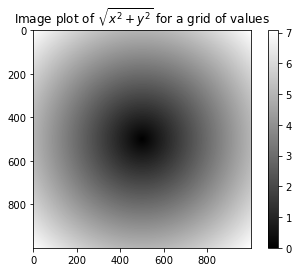

In [105]:
import matplotlib.pyplot as plt
plt.imshow(z, cmap=plt.cm.gray); plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

### 将条件逻辑表述为数组运算
numpy.where函数是三元表达式x if condition else y的向量化版本。假设我们有一个布尔数组和两个值数组：

In [106]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

假设我们想要根据cond中的值选取xarr和yarr的值：当cond中的值为True时，选取xarr的值，否则从yarr中选取。列表推导式的写法应该如下所示：

In [107]:
result = [(x if c else y) for x,y,c in zip(xarr, yarr, cond)]
result

[1.1, 2.2, 1.3, 1.4, 2.5]

这有几个问题。第一，它对大数组的处理速度不是很快（因为所有工作都是由纯 Python 完成的）。第二，无法用于多维数组。若使用np.where，则可以将该功能写得非常简洁：

In [111]:
result = np.where(cond, xarr, yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

In [114]:
arr = np.random.randn(4,4)
arr

array([[-2.2577023 ,  0.64952884,  0.02045251, -0.39541469],
       [ 1.36671368, -0.68742162,  0.65343252, -0.01431528],
       [-1.04873015, -1.73953731, -0.70354346,  1.63896238],
       [ 0.85170555,  0.89831981,  1.4578544 ,  1.03994742]])

In [115]:
arr = np.where(arr < 0, -2, arr)
arr

array([[-2.        ,  0.64952884,  0.02045251, -2.        ],
       [ 1.36671368, -2.        ,  0.65343252, -2.        ],
       [-2.        , -2.        , -2.        ,  1.63896238],
       [ 0.85170555,  0.89831981,  1.4578544 ,  1.03994742]])

### 数学和统计方法

## 4.4 用于数组的文件输入输出

In [124]:
arr = np.arange(15)
np.save('some_array', arr)  #将array存储到磁盘中，自动生成扩展名为npy的文件

In [125]:
np.load('some_array.npy')  #读取npy文件

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

通过np.savez可以将多个数组保存到一个未压缩文件中，将数组以关键字参数的形式传入即可：

In [129]:
np.savez('array_archive.npz', a=arr, b=arr1)

In [130]:
arch = np.load('array_archive.npz')

In [131]:
arch['a']

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [132]:
arch['b']

array([[ 0.270419  ,  0.26546661,  0.38344011, -0.76679947],
       [ 0.8170954 , -0.50459625,  0.88734269, -1.31559547],
       [-0.67691324,  1.5596884 ,  0.26150437,  0.82253518]])

## 4.5 线性代数

In [135]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])
print(x)
print(y)

[[1. 2. 3.]
 [4. 5. 6.]]
[[ 6. 23.]
 [-1.  7.]
 [ 8.  9.]]


In [136]:
x.dot(y)  #等价于 np.dot(x, y) ，以及 x@y

array([[ 28.,  64.],
       [ 67., 181.]])

In [137]:
np.dot(x, y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [138]:
x@y

array([[ 28.,  64.],
       [ 67., 181.]])

## 4.6 伪随机数生成 

## 4.7 示例：随机漫步

下面是一个通过内置的random模块以纯 Python 的方式实现 1000 步的随机漫步：

In [143]:
import random

position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step=1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

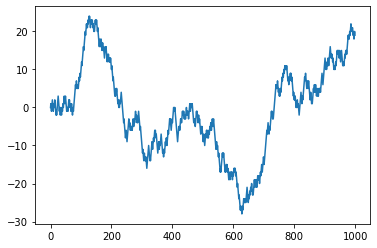

In [146]:
plt.plot(walk[:1000])  # 根据1000随机漫步值生成的折线图

用np.random模块一次性随机产生 1000 个“掷硬币”结果（即两个数中任选一个），将其分别设置为 1 或 -1，然后计算累计和：

In [150]:
nsteps = 1000
draws = np.random.randint(0, 2, size=nsteps)
draws = np.where(draws > 0, 1, -1)
walk = np.cumsum(draws)

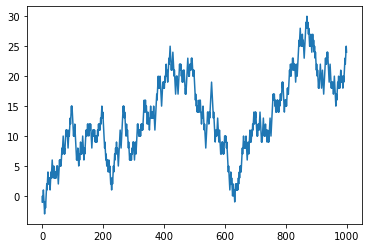

In [151]:
plt.plot(walk[:1000])

In [152]:
walk.min()

-3

In [153]:
walk.max()

30

In [157]:
np.argmax?

一次模拟500个随机漫步：

In [163]:
nwalks = 500
nsteps = 500
draws = np.random.randint(0, 2, size=(nwalks, nsteps))
draws = np.where(draws > 0, 1, -1)
print(draws)
walks = draws.cumsum(1)
print(walks)

[[-1  1 -1 ... -1  1  1]
 [-1  1  1 ... -1  1 -1]
 [-1  1  1 ... -1 -1 -1]
 ...
 [-1 -1 -1 ... -1  1 -1]
 [ 1 -1  1 ... -1  1  1]
 [-1  1 -1 ... -1 -1 -1]]
[[ -1   0  -1 ... -10  -9  -8]
 [ -1   0   1 ... -40 -39 -40]
 [ -1   0   1 ...   0  -1  -2]
 ...
 [ -1  -2  -3 ...  -6  -5  -6]
 [  1   0   1 ...  10  11  12]
 [ -1   0  -1 ...  10   9   8]]


In [165]:
walks.min()

-76

In [166]:
walks.max()

74

# 第 5 章-pandas入门
pandas 是专门为处理表格和混杂数据设计的。而 NumPy 更适合处理统一的数值数组数据。

In [168]:
import pandas as pd

## 5.1 pandas 的数据结构介绍
要使用 pandas，你首先就得熟悉它的两个主要数据结构：Series和DataFrame

### Series
Series是一种类似于一维数组的对象，它由一组数据（各种 NumPy 数据类型）以及一组与之相关的数据标签（即索引）组成。仅由一组数据即可产生最简单的Series：

In [169]:
obj = pd.Series([4, 7, -5, 3])
obj

0    4
1    7
2   -5
3    3
dtype: int64

In [171]:
obj.values

array([ 4,  7, -5,  3])

In [172]:
obj.index

RangeIndex(start=0, stop=4, step=1)

通常，我们希望所创建的Series带有一个可以对各个数据点进行标记的索引：

In [175]:
obj = pd.Series([4,7,-5,3], index=['a', 'b', 'c', 'd'])
obj

a    4
b    7
c   -5
d    3
dtype: int64

In [176]:
obj.values

array([ 4,  7, -5,  3])

In [177]:
obj.index

Index(['a', 'b', 'c', 'd'], dtype='object')

可以通过索引的方式选取Series中的单个或一组值：

In [180]:
obj['d'] = 8
obj['b']

7

In [181]:
obj[['a','c','d']]

a    4
c   -5
d    8
dtype: int64

使用 NumPy 函数或类似 NumPy 的运算（如根据布尔型数组进行过滤、标量乘法、应用数学函数等）都会保留索引值的链接：

In [182]:
obj[obj>0]

a    4
b    7
d    8
dtype: int64

In [183]:
obj * 2

a     8
b    14
c   -10
d    16
dtype: int64

In [184]:
np.exp(obj)

a      54.598150
b    1096.633158
c       0.006738
d    2980.957987
dtype: float64

还可以将Series看成是一个定长的有序字典，因为它是索引值到数据值的一个映射。它可以用在许多原本需要字典参数的函数中：

In [185]:
'b' in obj

True

In [186]:
'e' in obj

False

如果数据被存放在一个 Python 字典中，也可以直接通过这个字典来创建Series：

In [194]:
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
sdata

{'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}

In [195]:
obj = pd.Series(sdata)
obj

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

如果只传入一个字典，则结果Series中的索引就是原字典的键（有序排列）。你可以传入排好序的字典的键以改变顺序：

In [196]:
states = ['California', 'Ohio', 'Oregon', 'Texas']
obj2 = pd.Series(sdata, index=states)
obj2  #index会自动匹配，‘Utah‘这个index不存在便被移除，California被添加，但是原字典中不存在对应k-v，故值为NaN

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

In [197]:
#isnull 返回 bool的Series  或 pd.isnull(obj)
a = obj2.isnull()
a

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [198]:
b = obj2.notnull() # notnull 同理  或 pd.notnull(obj)
b

California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool

对于许多应用而言，Series最重要的一个功能是，它会根据运算的索引标签自动对齐数据：

In [199]:
obj

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

In [201]:
obj2

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

In [202]:
obj + obj2

California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64

Series对象本身及其索引都有一个name属性，该属性跟 pandas 其他的关键功能关系非常密切

In [203]:
obj2.name = 'population'
obj2.index.name = 'state'

In [204]:
obj2

state
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
Name: population, dtype: float64

In [207]:
obj3 = pd.Series([4,7,-5,3], index=['a', 'b', 'c', 'd'])
obj3

a    4
b    7
c   -5
d    3
dtype: int64

In [209]:
obj3.index = ['Bob', 'Steve', 'Jeff', 'Ryan']
obj3

Bob      4
Steve    7
Jeff    -5
Ryan     3
dtype: int64

### DataFrame

In [210]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002, 2003],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}

In [211]:
frame = pd.DataFrame(data)
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [213]:
frame.head()  #head 选取dataframe的前5行

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


如果指定了列序列，则DataFrame的列就会按照指定顺序进行排列：

In [215]:
pd.DataFrame(data, columns=['year', 'state', 'pop'])

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9
5,2003,Nevada,3.2


如果传入的列在数据中找不到，就会在结果中产生缺失值：

In [217]:
frame2 = pd.DataFrame(data, columns=['year', 'state', 'pop', 'debt'], index=['one', 'two', 'three', 'four', 'five', 'six'])
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


In [218]:
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

In [220]:
frame2.values

array([[2000, 'Ohio', 1.5, nan],
       [2001, 'Ohio', 1.7, nan],
       [2002, 'Ohio', 3.6, nan],
       [2001, 'Nevada', 2.4, nan],
       [2002, 'Nevada', 2.9, nan],
       [2003, 'Nevada', 3.2, nan]], dtype=object)

In [221]:
frame2.state  # 等价于 frame2['state']

# frame2[column]适用于任何列的名，但是frame2.column只有在列名是一个合理的 Python 变量名时才适用。

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
six      Nevada
Name: state, dtype: object

In [226]:
frame2.loc['three']  # 根据index取一行的数据

year     2002
state    Ohio
pop       3.6
debt      NaN
Name: three, dtype: object

In [228]:
frame2['debt'] = 15.5  #广播赋值
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,15.5
two,2001,Ohio,1.7,15.5
three,2002,Ohio,3.6,15.5
four,2001,Nevada,2.4,15.5
five,2002,Nevada,2.9,15.5
six,2003,Nevada,3.2,15.5


In [229]:
frame2['debt'] = np.arange(6.)
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,0.0
two,2001,Ohio,1.7,1.0
three,2002,Ohio,3.6,2.0
four,2001,Nevada,2.4,3.0
five,2002,Nevada,2.9,4.0
six,2003,Nevada,3.2,5.0


将列表或数组赋值给某个列时，其长度必须跟DataFrame的长度相匹配。如果赋值的是一个Series，就会精确匹配DataFrame的索引，所有的空位都将被填上缺失值：

In [230]:
val = pd.Series([-1.2, -1.5, -1.7], index=['two', 'four', 'five'])
frame2['debt'] = val
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7
six,2003,Nevada,3.2,NaN


为不存在的列赋值会创建出一个新列。关键字del用于删除列。

In [232]:
frame2['eastern'] = frame2['state'] == 'Ohio'
frame2

,year,state,pop,debt,eastern
one,2000,Ohio,1.5,NaN,True
two,2001,Ohio,1.7,-1.2,True
three,2002,Ohio,3.6,NaN,True
four,2001,Nevada,2.4,-1.5,False
five,2002,Nevada,2.9,-1.7,False
six,2003,Nevada,3.2,NaN,False


In [233]:
del frame2['eastern']
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7
six,2003,Nevada,3.2,NaN


In [234]:
pop = {'Nevada': {2001: 2.4, 2002: 2.9}, 'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}
frame3 = pd.DataFrame(pop)
frame3

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


内层字典的键会被合并、排序以形成最终的索引。如果明确指定了索引，则不会这样：

In [235]:
pd.DataFrame(pop, index=[2001, 2002, 2003])

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2003,NaN,NaN


In [237]:
pdata = {'Ohio': frame3['Ohio'][:-1], 'Nevada': frame3['Nevada'][:2]}
pd.DataFrame(pdata)

,Ohio,Nevada
2001,1.7,2.4
2002,3.6,2.9


In [238]:
frame3.values

array([[2.4, 1.7],
       [2.9, 3.6],
       [nan, 1.5]])

In [239]:
frame2.values  #dataframe.values的dtype会选用尽量兼容所有列的数据类型

array([[2000, 'Ohio', 1.5, nan],
       [2001, 'Ohio', 1.7, -1.2],
       [2002, 'Ohio', 3.6, nan],
       [2001, 'Nevada', 2.4, -1.5],
       [2002, 'Nevada', 2.9, -1.7],
       [2003, 'Nevada', 3.2, nan]], dtype=object)

### 索引对象
pandas 的索引对象负责管理轴标签和其他元数据（比如轴名称等）。构建Series或DataFrame时，所用到的任何数组或其他序列的标签都会被转换成一个Index：

In [240]:
obj = pd.Series(range(3), index=['a', 'b', 'C'])
obj

a    0
b    1
C    2
dtype: int64

In [241]:
obj.index

Index(['a', 'b', 'C'], dtype='object')

In [245]:
obj.index[1:]

Index(['b', 'C'], dtype='object')

In [246]:
obj.index[1] = 'd'  # Error , Index 不可变

TypeError: Index does not support mutable operations

In [248]:
labels = pd.Index(np.arange(3))
labels

Int64Index([0, 1, 2], dtype='int64')

In [249]:
obj2 = pd.Series([1.5, 2, -3.4], index=labels)
obj2

0    1.5
1    2.0
2   -3.4
dtype: float64

In [251]:
obj2.index is labels

True

In [252]:
dup_labels = pd.Index(['foo', 'foo', 'bar', 'bar'])  # 与python集合不同，pandas Index可以包含重复标签
dup_labels                                           # 选择重复的标签，会显示所有的结果。

Index(['foo', 'foo', 'bar', 'bar'], dtype='object')

## 5.2 基本功能
介绍操作Series和DataFrame中的数据的基本手段
### 重新索引
pandas 对象的一个重要方法是reindex，其作用是创建一个新对象，它的数据符合新的索引。看下面的例子：

In [4]:
obj = pd.Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])
obj

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

In [11]:
#用该Series的reindex将会根据新索引进行重排。如果某个索引值当前不存在，就引入缺失值：
obj.reindex(['a','b','c','d','e'])

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

对于时间序列这样的有序数据，重新索引时可能需要做一些插值处理。method选项即可达到此目的，例如，使用ffill可以实现前向值填充：

In [12]:
obj3 = pd.Series(['blue', 'purple', 'yellow'], index=[0,2,4])
obj3

0      blue
2    purple
4    yellow
dtype: object

In [16]:
obj3.reindex(range(7), method='ffill')

0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
6    yellow
dtype: object

In [17]:
frame = pd.DataFrame(np.arange(9).reshape(3,3), index=['a', 'c', 'd'], columns=['Ohio', 'Texas', 'California'])
frame

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


In [18]:
frame2 = frame.reindex(['a', 'b', 'c', 'd'])
frame2

,Ohio,Texas,California
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0


In [20]:
#列可以用columns关键字重新索引：
states = ['Texas', 'Utah', 'California']
frame.reindex(columns=states)

,Texas,Utah,California
a,1,NaN,2
c,4,NaN,5
d,7,NaN,8


### 丢弃指定轴上的项
丢弃某条轴上的一个或多个项很简单，只要有一个索引数组或列表即可。由于需要执行一些数据整理和集合逻辑，所以drop方法返回的是一个在指定轴上删除了指定值的新对象：

In [23]:
obj = pd.Series(np.arange(5.), index=['a', 'b', 'c', 'd', 'e'])
obj

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

In [24]:
new_obj = obj.drop('c')
new_obj

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

In [25]:
obj

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

In [28]:
obj.drop(['b','c'])

a    0.0
d    3.0
e    4.0
dtype: float64

In [31]:
data = pd.DataFrame(np.arange(16).reshape(4,4), index=['Ohio', 'Colorado', 'Utah', 'New York'], columns=['one','two','three','four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [42]:
data.drop('New York')  # default situation axis=0 or axis='index'

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11


In [39]:
data.drop(['one', 'three'], axis='columns')  # or axis=1

,two,four
Ohio,1,3
Colorado,5,7
Utah,9,11
New York,13,15


In [47]:
obj.drop('c', inplace=True)   # 默认情况下，drop函数不修改原有数据结构，返回新的数据结构
obj                           # inplace=True 可以设置在原数据结构中修改，这样会永久性的导致原有数据结构修改

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

### 索引、选取和过滤

In [50]:
obj = pd.Series(np.arange(4.), index=['a','b','c','d'])
obj

a    0.0
b    1.0
c    2.0
d    3.0
dtype: float64

In [51]:
obj['b']

1.0

In [53]:
obj[:3]

a    0.0
b    1.0
c    2.0
dtype: float64

In [55]:
obj[[1,3]]

b    1.0
d    3.0
dtype: float64

利用标签的切片运算与普通的 Python 切片运算不同，其末端是包含的：

In [56]:
obj['a':'c']

a    0.0
b    1.0
c    2.0
dtype: float64

In [57]:
obj['b':'c'] = 5
obj

a    0.0
b    5.0
c    5.0
d    3.0
dtype: float64

In [58]:
data = pd.DataFrame(np.arange(16).reshape(4,4), index=['Ohio', 'Colorado', 'Utah', 'New York'], columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [59]:
data['two']

Ohio         1
Colorado     5
Utah         9
New York    13
Name: two, dtype: int64

In [61]:
data[['three', 'one']]

,three,one
Ohio,2,0
Colorado,6,4
Utah,10,8
New York,14,12


这种索引方式有几个特殊的情况。首先通过切片或布尔型数组选取数据：

In [66]:
data[:2]

# 选取行的语法data[:2]十分方便。向[ ]传递单一的元素或列表，就可选择列。

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7


In [65]:
data[data['three'] > 5]

,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [67]:
#另一种用法是通过布尔型DataFrame（比如下面这个由标量比较运算得出的）进行索引：
data < 5

,one,two,three,four
Ohio,True,True,True,True
Colorado,True,False,False,False
Utah,False,False,False,False
New York,False,False,False,False


In [68]:
data[data < 5] = 0
data

,one,two,three,four
Ohio,0,0,0,0
Colorado,0,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


### 用loc和iloc进行选取
使用轴标签（loc）或整数索引（iloc），从DataFrame选择行和列的子集。

In [72]:
data.loc['Colorado', ['one', 'three']]

one      0
three    6
Name: Colorado, dtype: int64

In [81]:
# 然后用iloc和整数进行选取：
data.iloc[3, [1, 2]]

two      13
three    14
Name: New York, dtype: int64

In [83]:
data.iloc[[1,2], [1,3,0]]

,two,four,one
Colorado,5,7,0
Utah,9,11,8


In [85]:
# 这两个索引函数也适用于一个标签或多个标签的切片：
data.loc[:'Utah', 'two']

Ohio        0
Colorado    5
Utah        9
Name: two, dtype: int64

In [89]:
data.iloc[:3, 1]

Ohio        0
Colorado    5
Utah        9
Name: two, dtype: int64

In [92]:
data.iloc[:, :3][data>5]

,one,two,three
Ohio,NaN,NaN,NaN
Colorado,NaN,NaN,6.0
Utah,8.0,9.0,10.0
New York,12.0,13.0,14.0


### 算术运算和数据对齐
pandas 最重要的一个功能是，它可以对不同索引的对象进行算术运算。在将对象相加时，如果存在不同的索引对，则结果的索引就是该索引对的并集。

In [3]:
s1 = pd.Series([7.3, -2.5, 3.4, 1.5], index=['a', 'c', 'd', 'e'])
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1], index=['a', 'c', 'e', 'f', 'g'])
print(s1)
print(s2)

a    7.3
c   -2.5
d    3.4
e    1.5
dtype: float64
a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64


In [4]:
s1 + s2  #自动的数据对齐操作在不重叠的索引处引入了 NA 值。缺失值会在算术运算过程中传播。

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

对于DataFrame，对齐操作会同时发生在行和列上：

In [5]:
df1 = pd.DataFrame(np.arange(9.).reshape((3, 3)), columns=list('bcd'), index=['Ohio', 'Texas', 'Colorado'])
df2 = pd.DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'), index=['Utah', 'Ohio', 'Texas', 'Oregon'])
print(df1)
print(df2)

            b    c    d
Ohio      0.0  1.0  2.0
Texas     3.0  4.0  5.0
Colorado  6.0  7.0  8.0
          b     d     e
Utah    0.0   1.0   2.0
Ohio    3.0   4.0   5.0
Texas   6.0   7.0   8.0
Oregon  9.0  10.0  11.0


In [6]:
df1 + df2

,b,c,d,e
Colorado,NaN,NaN,NaN,NaN
Ohio,3.0,NaN,6.0,NaN
Oregon,NaN,NaN,NaN,NaN
Texas,9.0,NaN,12.0,NaN
Utah,NaN,NaN,NaN,NaN


In [16]:
df1 = pd.DataFrame({'A': [1, 2]})
df2 = pd.DataFrame({'B': [3, 4]})
df2

,B
0,3
1,4


In [18]:
df1 - df2

,A,B
0,NaN,NaN
1,NaN,NaN


### 排序和排名

In [21]:
obj = pd.Series(np.arange(5), index=list('bcead'))
obj

b    0
c    1
e    2
a    3
d    4
dtype: int64

In [23]:
obj.sort_index()

a    3
b    0
c    1
d    4
e    2
dtype: int64

In [34]:
obj2 = pd.DataFrame(np.arange(12).reshape(3,4), index=['four', 'one', 'three'], columns=list('ebgc'))
obj2

,e,b,g,c
four,0,1,2,3
one,4,5,6,7
three,8,9,10,11


In [37]:
obj2.sort_index(axis=1)

,b,c,e,g
four,1,3,0,2
one,5,7,4,6
three,9,11,8,10


In [38]:
obj3 = pd.Series([7, -5, 7, 4, 2, 0, 4])
obj3

0    7
1   -5
2    7
3    4
4    2
5    0
6    4
dtype: int64

In [39]:
# rank是通过“为各组分配一个平均排名”的方式破坏平级关系的：
obj3.rank()

# 当有并列排名时，将并列排名取平均值

0    6.5
1    1.0
2    6.5
3    4.5
4    3.0
5    2.0
6    4.5
dtype: float64

In [41]:
# 也可以根据值在原数据中出现的顺序给出排名：
obj3.rank(method='first')

0    6.0
1    1.0
2    7.0
3    4.0
4    3.0
5    2.0
6    5.0
dtype: float64

In [45]:
# ascending=False 代表降序，这个参数可以推广到所有排序的函数
obj3.rank(method='first', ascending=False)

0    1.0
1    7.0
2    2.0
3    3.0
4    5.0
5    6.0
6    4.0
dtype: float64

In [47]:
frame = pd.DataFrame({'b': [4.3, 7, -3, 2], 'a': [0, 1, 0, 1], 'c': [-2, 5, 8, -2.5]})
frame

,b,a,c
0,4.3,0,-2.0
1,7.0,1,5.0
2,-3.0,0,8.0
3,2.0,1,-2.5


In [49]:
frame.rank(method='first')

,b,a,c
0,3.0,1.0,2.0
1,4.0,3.0,3.0
2,1.0,2.0,4.0
3,2.0,4.0,1.0


In [50]:
# axis='columns' 可以计算DataFrame中行上的排序
frame.rank(axis=1, method='first')

,b,a,c
0,3.0,2.0,1.0
1,3.0,1.0,2.0
2,1.0,2.0,3.0
3,3.0,2.0,1.0


In [60]:
f = pd.DataFrame(np.arange(9).reshape(3,3), index=list('aab'), columns=list('abc'))
f

,a,b,c
a,0,1,2
a,3,4,5
b,6,7,8


In [61]:
f.loc['a']

,a,b,c
a,0,1,2
a,3,4,5


In [62]:
f = pd.DataFrame(np.arange(9).reshape(3,3), index=list('aab'), columns=list('bbc'))
f

,b,b,c
a,0,1,2
a,3,4,5
b,6,7,8


In [64]:
f.loc['a', 'b']

,b,b
a,0,1
a,3,4


## 5.3 汇总和计算描述统计

In [65]:
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5], [np.nan, np.nan], [0.75, -1.3]], index=['a', 'b', 'c', 'd'], columns=['one', 'two'])
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [67]:
df.sum()

one    9.25
two   -5.80
dtype: float64

In [69]:
df.sum(axis=1)

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

In [72]:
# NA 值会自动被排除，除非整个切片（这里指的是行或列）都是 NA。通过skipna选项可以禁用该功能：
df.sum(axis=1, skipna=False)

a     NaN
b    2.60
c     NaN
d   -0.55
dtype: float64

In [73]:
df.sum().sum()

3.45

In [77]:
df.idxmax()

one    b
two    d
dtype: object

# 第 6 章 数据加载、存储与文件格式
## 6.1 读写文本格式的数据

In [34]:
obj = """
{"name": "Wes",
 "places_lived": ["United States", "Spain", "Germany"],
 "pet": null,
 "siblings": [{"name": "Scott", "age": 30, "pets": ["Zeus", "Zuko"]},
              {"name": "Katie", "age": 38,
               "pets": ["Sixes", "Stache", "Cisco"]}]
}
"""
obj

'\n{"name": "Wes",\n "places_lived": ["United States", "Spain", "Germany"],\n "pet": null,\n "siblings": [{"name": "Scott", "age": 30, "pets": ["Zeus", "Zuko"]},\n              {"name": "Katie", "age": 38,\n               "pets": ["Sixes", "Stache", "Cisco"]}]\n}\n'

In [37]:
import json
result = json.loads(obj)
result

{'name': 'Wes',
 'places_lived': ['United States', 'Spain', 'Germany'],
 'pet': None,
 'siblings': [{'name': 'Scott', 'age': 30, 'pets': ['Zeus', 'Zuko']},
  {'name': 'Katie', 'age': 38, 'pets': ['Sixes', 'Stache', 'Cisco']}]}

In [50]:
pd.DataFrame(result['siblings'], columns=['name', 'age', 'pets'])

,name,age,pets
0,Scott,30,"[Zeus, Zuko]"
1,Katie,38,"[Sixes, Stache, Cisco]"


# 第 9 章 绘图与可视化

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


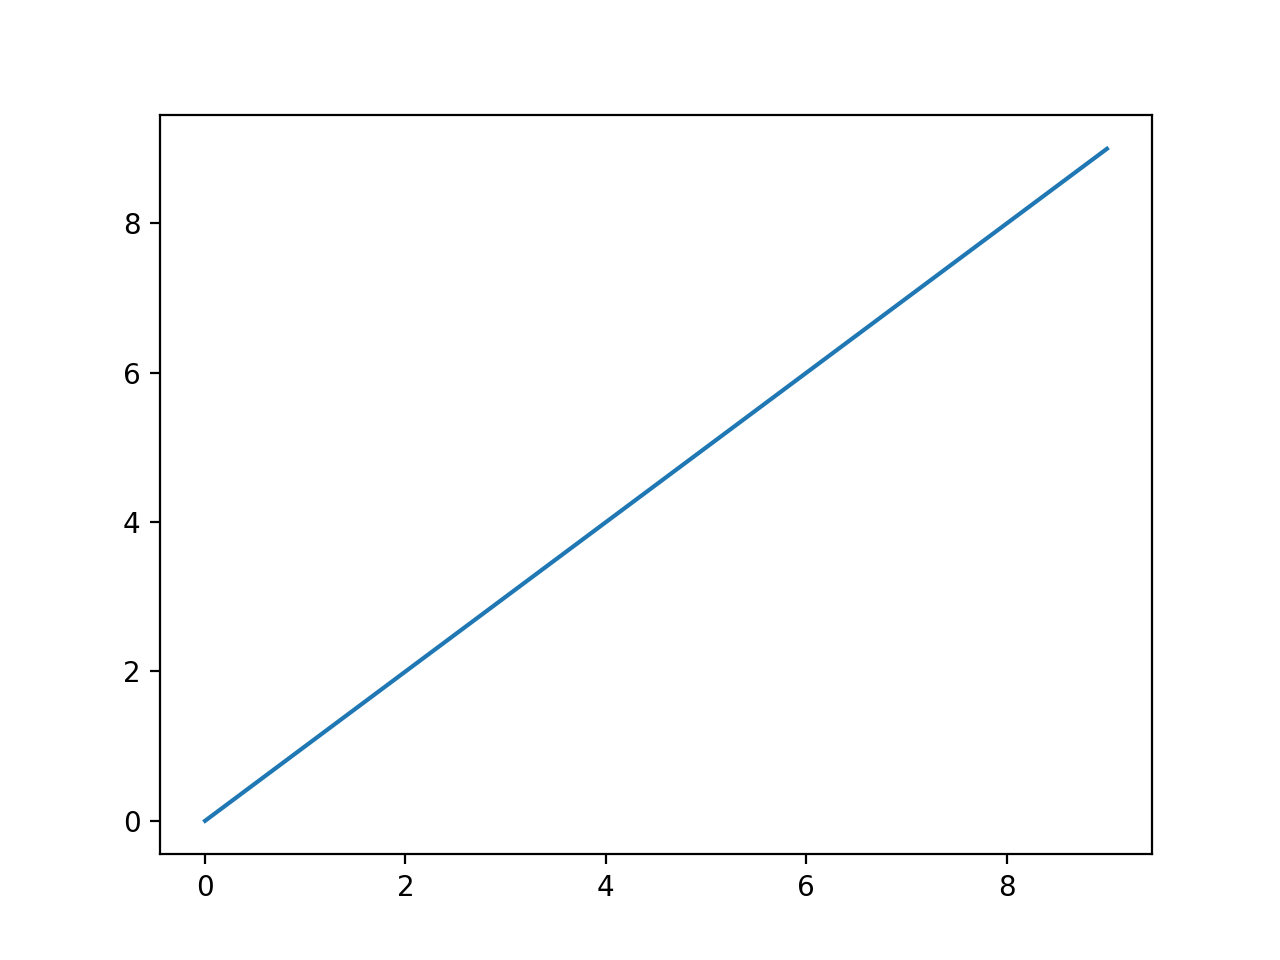

In [11]:
data = np.arange(10)
plt.plot(data)

In [23]:
plt.plot(np.random.randn(30).cumsum(), 'r')

<IPython.core.display.Javascript object>


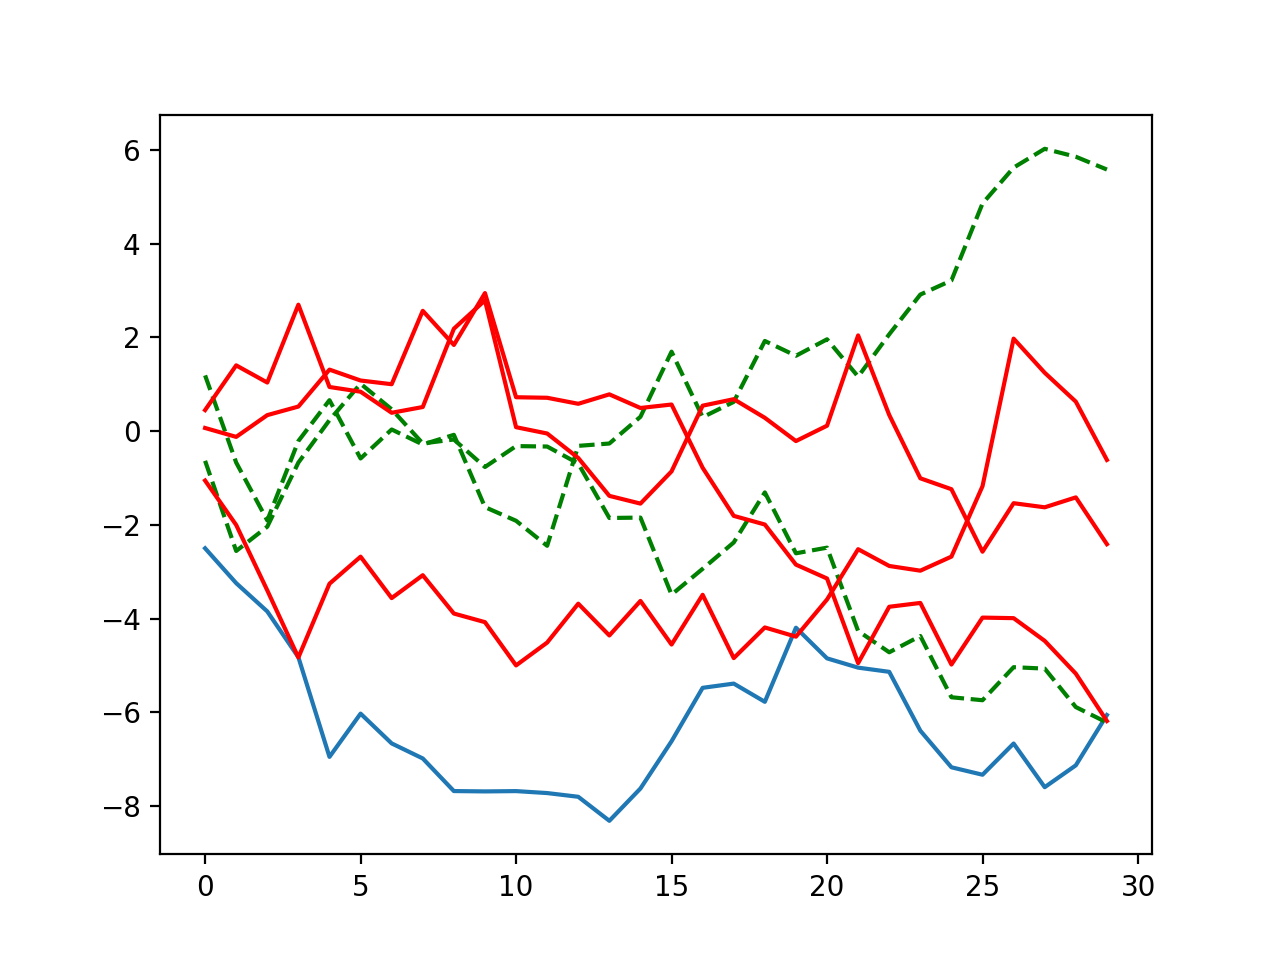

In [24]:
fig

<IPython.core.display.Javascript object>


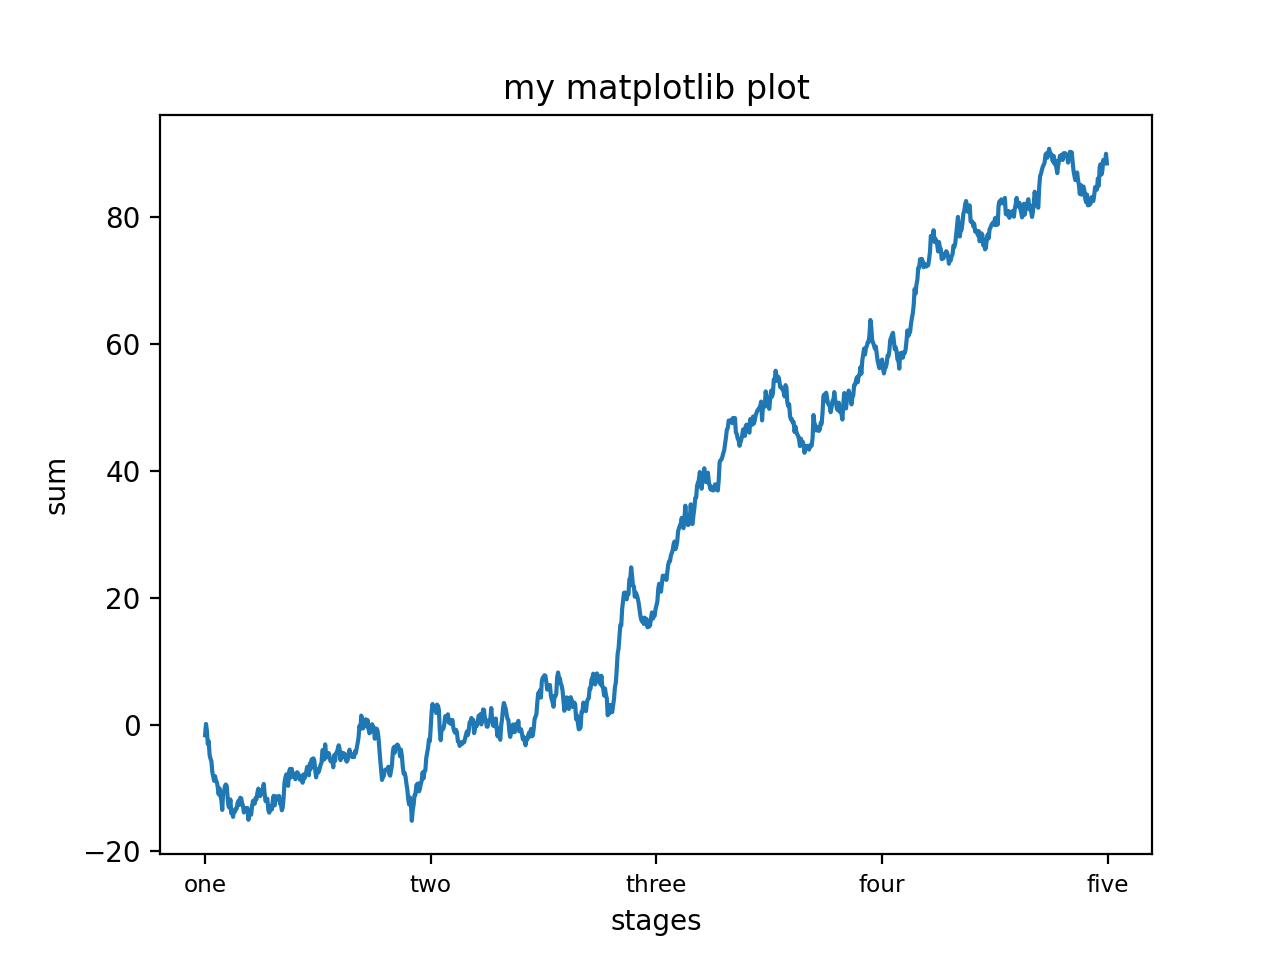

Text(0, 0.5, 'sum')

In [46]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

ax.set_xticks([0, 250, 500, 750, 1000])
ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], fontsize='small')
ax.set_title('my matplotlib plot')
ax.set_xlabel('stages')
ax.set_ylabel('sum')

<IPython.core.display.Javascript object>


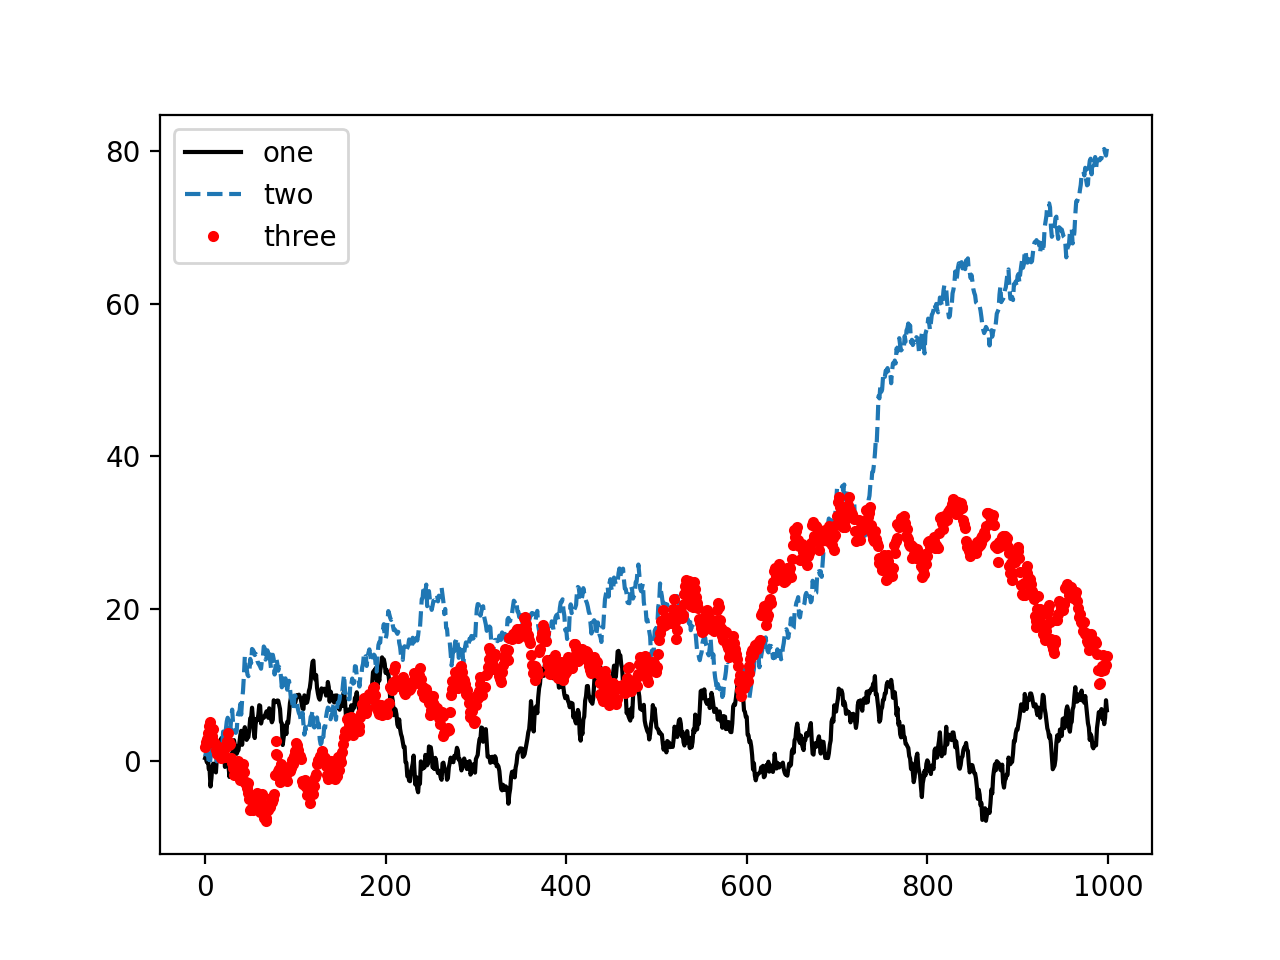

In [56]:
ax = plt.figure().add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum(), 'k', label='one')

In [57]:
ax.plot(np.random.randn(1000).cumsum(), '--', label='two')

In [59]:
ax.plot(np.random.randn(1000).cumsum(), 'r.', label='three')

In [60]:
ax.legend(loc='best')